# Challenge Set 7 - Classification challenges

In [28]:
import pandas as pd
import html5lib
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
import dateutil

from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split

from sklearn.linear_model import LinearRegression

%matplotlib inline

from sklearn.metrics import r2_score

import statsmodels.api as sm

import seaborn as sns

C:\Users\aj282_000\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


#### Challenge 1

In [ ]:
df = pd.read_csv("C:/Users/aj282/OneDrive/thisismetis/sf17_ds8_workingdirectory/challenges/challeges_questions/07-classification/house-votes-84.data", header=None)

In [3]:
df = pd.read_csv("C:/Users/aj282_000/OneDrive/thisismetis/sf17_ds8_workingdirectory/challenges/challeges_questions/07-classification/house-votes-84.data", header=None)

In [4]:
df.columns = ['Party', 'Vote1', 'Vote2', 'Vote3', 'Vote4','Vote5','Vote6','Vote7','Vote8','Vote9','Vote10','Vote11','Vote12','Vote13','Vote14','Vote15', 'Vote16']

In [5]:
df.head()

,Party,Vote1,Vote2,Vote3,Vote4,Vote5,Vote6,Vote7,Vote8,Vote9,Vote10,Vote11,Vote12,Vote13,Vote14,Vote15,Vote16
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [6]:
# from pandas import *
# import re

# at = re.compile(r"y", re.I)
# def count_emails(string):
#     count = 0
#     for i in at.finditer(string):
#         count += 1
#     return count

# df["count"] = df.loc[1:].apply(count_emails)


In [7]:
for i in range(1,len(df.columns)):
    df.iloc[:,i] = df.iloc[:,i].map({'n': 0, 'y': 1})

In [8]:
df.head(10)

,Party,Vote1,Vote2,Vote3,Vote4,Vote5,Vote6,Vote7,Vote8,Vote9,Vote10,Vote11,Vote12,Vote13,Vote14,Vote15,Vote16
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0
5,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
6,democrat,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0,1.0
7,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,1.0
8,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
9,democrat,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN


In [9]:
# df['mean'] = df.mean(axis=1)

In [10]:
for i in range(1,len(df.columns)):
    mean = df.iloc[:,i].mean()
    std = df.iloc[:,i].std()
    normaldist = np.random.normal(mean, std, 1000)
    s = int(np.random.choice(normaldist, 1))
    df.iloc[:,i].fillna(s, inplace=True)

In [11]:
df.head()

,Party,Vote1,Vote2,Vote3,Vote4,Vote5,Vote6,Vote7,Vote8,Vote9,Vote10,Vote11,Vote12,Vote13,Vote14,Vote15,Vote16
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
2,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0


In [12]:
# nulldata = df['n'].isnull()
# mean = df['n'].mean()
# df.loc[nulldata] = df.dropna().sample(mean).values

In [13]:
# df['mean'] = df.loc[1:].apply(lambda x: x.sum if x != NaN )

In [14]:
# df['mean'] = df[['n', 'y', 'n.1', 'y.1', 'y.2', 'y.3', 'n.2', 'n.3', 'n.4', 'y.4', '?', 'y.5', 'y.6', 'y.7', 'n.5', 'y.8']].applymap(lambda x: str.count(x, 'y')).apply(lambda x: sum(x))
# #d2', 'n.3', 'n.4', 'y.4', '?', 'y.5', 'y.6', 'y.7', 'n.5', 'y.8']

In [15]:
#df['.iloc'][:,1:] = df.iloc[:,1:].T.fillna(df.iloc[:,1:].mean(axis=1), axis=1).T

In [16]:
X =  df.iloc[:,1:]
y = df['Party']

#### Challenge 2

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=4444)

In [18]:
X2 = np.linspace(0,20, 20)

results = pd.DataFrame()  #columns=['Iteration', 'TrainingError', 'TestingError']

results['K'] = X2
results['Accuracy'] = X2


#### Challenge 3

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

for k in range(1,20):
    
    knc_model = KNeighborsClassifier(n_neighbors=k)
    knc_model.fit(X_train,y_train)
    test_set_pred = knc_model.predict(X_test)
    acc_score = accuracy_score(y_test, test_set_pred)

    results['K'][k] = k
    results['Accuracy'][k] = acc_score
    

In [20]:
results[results['Accuracy'] == results['Accuracy'].max()]

,K,Accuracy
3,3.0,0.923664
4,4.0,0.923664
6,6.0,0.923664
7,7.0,0.923664
8,8.0,0.923664


#### Challenge 4

In [21]:
X2 = np.linspace(0,20, 20)
l2 = np.linspace(.1,2.0, 20)

results2 = pd.DataFrame()  #columns=['Iteration', 'TrainingError', 'TestingError']

results2['l2'] = X2
results2['Accuracy'] = X2

In [22]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# for i, l in enumerate(results2['l2']):
    
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
test_set_pred = lr_model.predict(X_test)
acc_score = accuracy_score(y_test, test_set_pred)


acc_score

0.93129770992366412

#### Challenge 5

In [23]:
df_gb = df.groupby('Party').count()
df_gb.head()

,Vote1,Vote2,Vote3,Vote4,Vote5,Vote6,Vote7,Vote8,Vote9,Vote10,Vote11,Vote12,Vote13,Vote14,Vote15,Vote16
Party,,,,,,,,,,,,,,,,
democrat,267,267,267,267,267,267,267,267,267,267,267,267,267,267,267,267
republican,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168


In [24]:
vc =  list(df['Party'].value_counts())#bins=['republican', 'democrat']
vc

[267, 168]

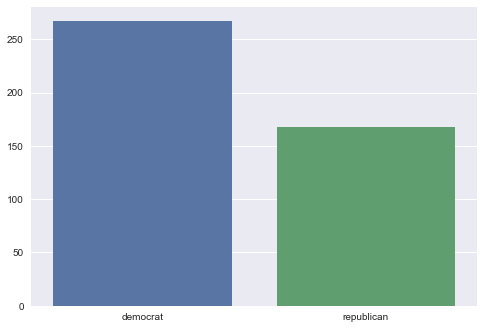

In [31]:
sns.barplot(x=['democrat','republican'], y=vc)

In [32]:
def democrat(X):
    democrat_list = []
    diff = 0
    for i in range(len(X)):
        democrat_list.append('democrat')
    for j in range(len(X)):
        if X[j] != democrat_list[j]:
            diff += 1
    return ((float(len(X)) - diff)/float(len(X)), democrat_list)

In [33]:
acc, democrat_list = democrat(['democrat','republican','democrat'])
print(acc, democrat_list)

0.6666666666666666 ['democrat', 'democrat', 'democrat']


In [34]:
def republican(X):
    republican_list = []
    diff = 0
    for i in range(len(X)):
        republican_list.append('republican')
    for j in range(len(X)):
        if X[j] != republican_list[j]:
            diff += 1
    return ((float(len(X)) - diff)/float(len(X)), republican_list)

In [35]:
acc, republican_list = republican(['democrat','republican','democrat'])
print(acc, republican_list)

0.3333333333333333 ['republican', 'republican', 'republican']


In [36]:
X2 = np.linspace(0,20, 20)

results3 = pd.DataFrame()  #columns=['Iteration', 'TrainingError', 'TestingError']

results3['K'] = X2
results3['Accuracy'] = X2

In [37]:
X_list = list(df['Party'])

In [38]:
acc, democrat_list = democrat(list(y_test))

In [39]:
len(democrat_list)

131

#### Challenge 6

In [40]:

for k in range(1,20):
    
    knc_model = KNeighborsClassifier(n_neighbors=k)
    knc_model.fit(X_train,y_train)
    test_set_pred = knc_model.predict(X_test)
    acc_score = accuracy_score(y_test, democrat_list)

    results3['K'][k] = k
    results3['Accuracy'][k] = acc_score

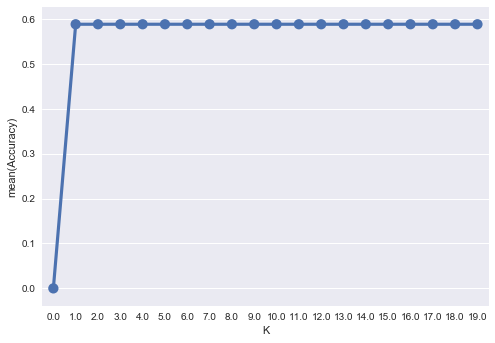

In [41]:
sns.pointplot(results3['K'],results3['Accuracy'])

#### Challenge 7

In [42]:
from sklearn.learning_curve import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(LogisticRegression(), X, y)

C:\Users\aj282_000\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\aj282_000\Anaconda3\lib\site-packages\sklearn\learning_curve.py:23: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


In [43]:
valid_scores

array([[ 0.97241379,  0.89655172,  0.88965517],
       [ 0.97241379,  0.92413793,  0.88965517],
       [ 0.96551724,  0.93793103,  0.91034483],
       [ 0.97241379,  0.95172414,  0.92413793],
       [ 0.97931034,  0.95862069,  0.94482759]])

In [44]:
train_cv_err = np.mean(train_scores, axis=1)
test_cv_err = np.mean(valid_scores, axis=1)
print(train_cv_err, test_cv_err)

[ 1.          0.9787234   0.9769392   0.97470238  0.96666667] [ 0.91954023  0.92873563  0.93793103  0.94942529  0.96091954]


C:\Users\aj282_000\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


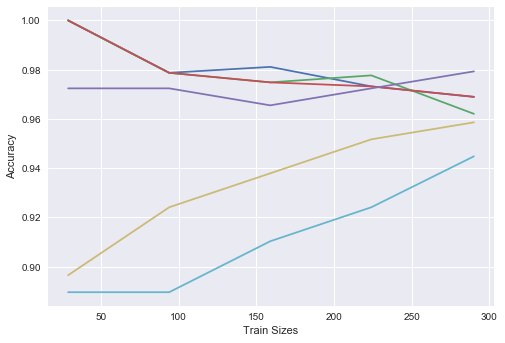

In [45]:
fig, ax = plt.subplots()
for Y in [train_scores, valid_scores]:
    ax.plot(train_sizes, Y)
ax.set_xlabel('Train Sizes')
ax.set_ylabel('Accuracy')
plt.legend(loc="upper left", bbox_to_anchor=[0, 1],
           ncol=2, shadow=True, title="Legend", fancybox=True)
# ax.get_legend()
plt.show()

#### Challenge 8

In [46]:
from sklearn.naive_bayes import GaussianNB

gnb_model = GaussianNB()
gnb_model.fit(X_train,y_train)
test_set_pred = gnb_model.predict(X_test)
acc_score = accuracy_score(y_test, test_set_pred)

print(acc_score)

0.93893129771


In [47]:
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(X_train,y_train)
test_set_pred = svc_model.predict(X_test)
acc_score = accuracy_score(y_test, test_set_pred)

print(acc_score)

0.954198473282


In [48]:
from sklearn.tree import DecisionTreeClassifier

dtc_model = DecisionTreeClassifier()
dtc_model.fit(X_train,y_train)
test_set_pred = dtc_model.predict(X_test)
acc_score = accuracy_score(y_test, test_set_pred)

print(acc_score)

0.923664122137


In [49]:
from sklearn.ensemble import RandomForestClassifier

rfc_model = RandomForestClassifier()
rfc_model.fit(X_train,y_train)
test_set_pred = rfc_model.predict(X_test)
acc_score = accuracy_score(y_test, test_set_pred)

print(acc_score)

0.954198473282


#### Challenge 9

In [50]:
from sklearn.cross_validation import cross_val_score
from sklearn.naive_bayes import GaussianNB

cvc = cross_val_score(GaussianNB(), X, y)
print(cvc)
print(np.mean(cvc))

[ 0.95172414  0.93793103  0.92413793]
0.937931034483


In [51]:

cvc = cross_val_score(SVC(), X, y)
print(cvc)
print(np.mean(cvc))

[ 0.97241379  0.95862069  0.94482759]
0.958620689655


In [52]:

cvc = cross_val_score(DecisionTreeClassifier(), X, y)
print(cvc)
print(np.mean(cvc))

[ 0.95172414  0.95862069  0.93103448]
0.947126436782


In [53]:
cvc = cross_val_score(RandomForestClassifier(), X, y)
print(cvc)
print(np.mean(cvc))

[ 0.97931034  0.96551724  0.92413793]
0.95632183908


In [54]:
# df = pd.read_csv("C:/Users/aj282/OneDrive/thisismetis/sf17_ds8_workingdirectory/challenges/challeges_questions/07-classification/house-votes-84.data", header=None)

#### Challenge 10

In [55]:
df = pd.read_csv("C:/Users/aj282_000/OneDrive/thisismetis/sf17_ds8_workingdirectory/challenges/challeges_questions/07-classification/house-votes-84.data", header=None)

In [56]:
df.columns = ['Party', 'Vote1', 'Vote2', 'Vote3', 'Vote4','Vote5','Vote6','Vote7','Vote8','Vote9','Vote10','Vote11','Vote12','Vote13','Vote14','Vote15', 'Vote16']

In [57]:
for i in range(1,len(df.columns)):
    df.iloc[:,i] = df.iloc[:,i].map({'n': 0, 'y': 1})

In [58]:
for i in range(1,len(df.columns)):
    mode = df.iloc[:,i].mode()
    df.iloc[:,i].fillna(mode[0], inplace=True)

In [59]:
df.head()

,Party,Vote1,Vote2,Vote3,Vote4,Vote5,Vote6,Vote7,Vote8,Vote9,Vote10,Vote11,Vote12,Vote13,Vote14,Vote15,Vote16
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
2,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0


In [60]:
df2 = df.iloc[:,1:]

In [61]:
df2.head()

,Vote1,Vote2,Vote3,Vote4,Vote5,Vote6,Vote7,Vote8,Vote9,Vote10,Vote11,Vote12,Vote13,Vote14,Vote15,Vote16
0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
1,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
2,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0


In [62]:
X = df2.iloc[:,0:15]
y = df2.iloc[:,15]

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=4444)

In [64]:
X2 = np.linspace(0,20, 20)

results4 = pd.DataFrame()  #columns=['Iteration', 'TrainingError', 'TestingError']

results4['K'] = X2
results4['Accuracy'] = X2

In [65]:
for k in range(1,20):
    
    knc_model = KNeighborsClassifier(n_neighbors=k)
    knc_model.fit(X_train,y_train)
    test_set_pred = knc_model.predict(X_test)
    acc_score = accuracy_score(y_test, test_set_pred)

    results4['K'][k] = k
    results4['Accuracy'][k] = acc_score

In [66]:
results4[results4['Accuracy'] == results4['Accuracy'].max()]

,K,Accuracy
13,13.0,0.870229


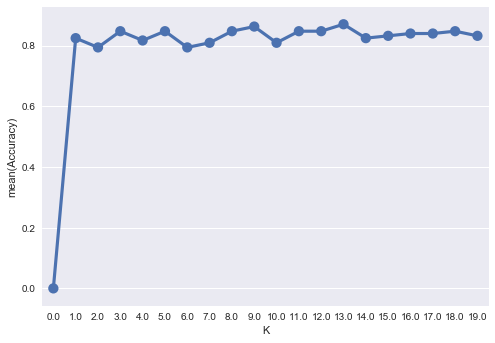

In [67]:
sns.pointplot(results4['K'],results4['Accuracy'])

In [68]:
cvc = cross_val_score(KNeighborsClassifier(), X, y)
print(cvc)
print(np.mean(cvc))

[ 0.82191781  0.8137931   0.77777778]
0.804496229815


#### Challenge 11

In [69]:
df = pd.read_csv("C:/Users/aj282_000/OneDrive/thisismetis/sf17_ds8_workingdirectory/challenges/challenges_data/2013_movies.csv")

In [70]:
df.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00


In [71]:
bins = [0, 50000000, 100000000, 200000000, 400000000, 10000000000]

In [72]:
group_names = [0, 1, 2, 3, 4]

In [73]:
df['DomesticTotalGross'] = pd.cut(df['DomesticTotalGross'], bins, labels=group_names)

In [74]:
df['DomesticTotalGross'].head()

0    4
1    4
2    4
3    3
4    3
Name: DomesticTotalGross, dtype: category
Categories (5, int64): [0 < 1 < 2 < 3 < 4]

In [75]:
vc =  df['DomesticTotalGross'].value_counts()#bins=['republican', 'democrat']
vc

1    34
0    31
2    22
3    10
4     3
Name: DomesticTotalGross, dtype: int64

In [76]:
vc_list =  list(df['DomesticTotalGross'].value_counts())#bins=['republican', 'democrat']
vc_list

[34, 31, 22, 10, 3]

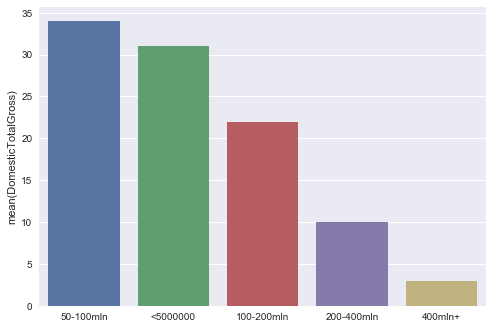

In [77]:
sns.barplot(x=['50-100mln','<5000000', '100-200mln', '200-400mln', '400mln+'], y=vc)

In [78]:
df.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,4,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
1,Iron Man 3,200000000.0,4,Shane Black,PG-13,129,2013-05-03 00:00:00
2,Frozen,150000000.0,4,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00
3,Despicable Me 2,76000000.0,3,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00
4,Man of Steel,225000000.0,3,Zack Snyder,PG-13,143,2013-06-14 00:00:00


In [79]:
df2 = pd.get_dummies(df, columns = ['Rating', 'Director'] )

In [80]:
df2.head()

,Title,Budget,DomesticTotalGross,Runtime,ReleaseDate,Rating_G,Rating_PG,Rating_PG-13,Rating_R,Director_Adam McKay,...,Director_Spike Jonze,Director_Stephen Frears,Director_Steve McQueen (II),Director_Steven Soderbergh,Director_Thor Freudenthal,Director_Todd Phillips,Director_Tommy Wirkola,Director_Tyler Perry,Director_Woody Allen,Director_Zack Snyder
0,The Hunger Games: Catching Fire,130000000.0,4,146,2013-11-22 00:00:00,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Iron Man 3,200000000.0,4,129,2013-05-03 00:00:00,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Frozen,150000000.0,4,108,2013-11-22 00:00:00,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Despicable Me 2,76000000.0,3,98,2013-07-03 00:00:00,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Man of Steel,225000000.0,3,143,2013-06-14 00:00:00,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [81]:
df2 = df2.dropna()

In [82]:
X = df2.iloc[:, 5:]
X['Budget'] = df2['Budget']
X['Runtime'] = df2['Runtime']

In [83]:

y = df2['DomesticTotalGross']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=4444)

X2 = np.linspace(0,20, 20)

results5 = pd.DataFrame()  #columns=['Iteration', 'TrainingError', 'TestingError']

results5['K'] = X2
results5['Accuracy'] = X2

In [84]:
count = float(df2['DomesticTotalGross'][df2['DomesticTotalGross']==1].count())

In [85]:
l = float(len(df2))

In [86]:
Baseline_predictor = count/l  #(((df2['DomesticTotalGross'][df2['DomesticTotalGross']==1]).count()//len(df2)) * 100)
Baseline_predictor

0.3595505617977528

In [87]:
for k in range(1,20):
    
    knc_model = KNeighborsClassifier(n_neighbors=k)
    knc_model.fit(X_train,y_train)
    test_set_pred = knc_model.predict(X_test)
    acc_score = accuracy_score(y_test, test_set_pred)

    results5['K'][k] = k
    results5['Accuracy'][k] = acc_score

In [88]:
results5[results5['Accuracy'] == results5['Accuracy'].max() ]

,K,Accuracy
11,11.0,0.592593


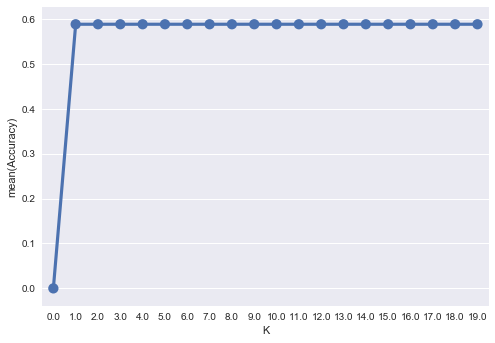

In [89]:
sns.pointplot(results5['K'],results3['Accuracy'])

In [90]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# for i, l in enumerate(results2['l2']):
    
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
test_set_pred = lr_model.predict(X_test)
acc_score = accuracy_score(y_test, test_set_pred)


acc_score

0.40740740740740738

In [91]:
lr_model.coef_

array([[  0.00000000e+00,  -2.08896439e-17,  -1.23329399e-16,
         -8.16455102e-17,  -2.06269092e-17,  -7.43425579e-18,
         -1.32700649e-17,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,  -1.87682265e-17,   4.46003166e-17,
         -1.26920477e-17,  -1.45118270e-17,  -2.76240613e-17,
         -2.24190131e-17,  -6.27464226e-18,  -2.24190131e-17,
          5.32977725e-17,  -8.65773286e-18,   0.00000000e+00,
          0.00000000e+00,  -2.24190131e-17,  -9.78603633e-18,
          3.76821931e-17,  -1.53126087e-17,  -2.13327787e-17,
         -1.58698244e-17,   0.00000000e+00,  -2.39135387e-17,
         -2.68286881e-17,  -1.02072881e-17,   0.00000000e+00,
         -5.57927349e-18,  -6.47823429e-18,   0.00000000e+00,
         -6.47823429e-18,  -2.96306310e-17,  -1.11230021e-17,
         -5.54642226e-17,   0.00000000e+00,  -2.72256728e-17,
          3.57919506e-17,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,  -1.42542261e-17,   0.00000000e+00,
        

#### Challenge 12

In [92]:
df = pd.read_csv("C:/Users/aj282_000/OneDrive/thisismetis/sf17_ds8_workingdirectory/challenges/challeges_questions/07-classification/haberman.data", header=None)

In [93]:
df.columns

Int64Index([0, 1, 2, 3], dtype='int64')

In [94]:
df.describe()

,0,1,2,3
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [95]:
df.columns = ['Age', 'YearofOp', 'PositiveNodes', 'SurvivalStatus']

In [96]:
df.head()

,Age,YearofOp,PositiveNodes,SurvivalStatus
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [97]:
df.groupby('SurvivalStatus').mean()
#Average Age Survived 5+ = 52.017778
#Average Age Survived <5 = 53.679012

,Age,YearofOp,PositiveNodes
SurvivalStatus,,,
1,52.017778,62.862222,2.791111
2,53.679012,62.827160,7.456790


In [98]:
df.groupby('SurvivalStatus').std()
#Std Dev Age Survived 5+ = 	11.012154
#Std Dev Age Survived <5 = 	10.167137

,Age,YearofOp,PositiveNodes
SurvivalStatus,,,
1,11.012154,3.222915,5.870318
2,10.167137,3.342118,9.185654


(array([ 16.,  27.,  46.,  53.,  55.,  41.,  41.,  18.,   7.,   2.]),
 array([ 30. ,  35.3,  40.6,  45.9,  51.2,  56.5,  61.8,  67.1,  72.4,
         77.7,  83. ]),
 <a list of 10 Patch objects>)

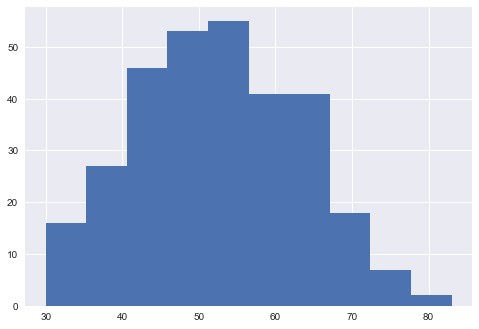

In [99]:
plt.hist(df['Age'])

In [100]:
df['YearofOp'].min()

58

In [101]:
df['YearofOp'].max()

69

In [102]:
X = df.iloc[:,0:3]
y = df['SurvivalStatus']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=4444)

In [103]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# for i, l in enumerate(results2['l2']):
    
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
test_set_pred = lr_model.predict(X_test)
acc_score = accuracy_score(y_test, test_set_pred)


acc_score

0.81521739130434778

In [104]:
lr_model.coef_

array([[ 0.0155515 , -0.02899279,  0.07136197]])

In [105]:
train_sizes, train_scores, valid_scores = learning_curve(LogisticRegression(), X, y)

C:\Users\aj282_000\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


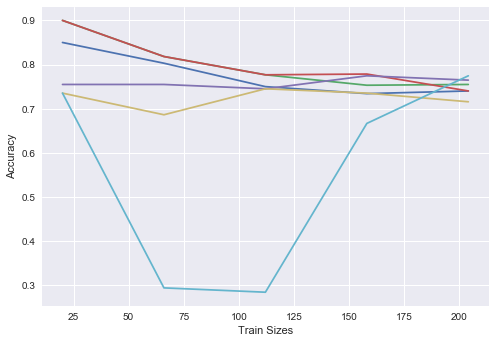

In [106]:
fig, ax = plt.subplots()
for Y in [train_scores, valid_scores]:
    ax.plot(train_sizes, Y)
ax.set_xlabel('Train Sizes')
ax.set_ylabel('Accuracy')
plt.legend(loc="upper left", bbox_to_anchor=[0, 1],
           ncol=2, shadow=True, title="Legend", fancybox=True)
# ax.get_legend()
plt.show()